In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline


# Analyze the data

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df['work_type'].unique() # to individually find attributes of a categorical variable

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [9]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
for i in df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]:
    print(df[i].value_counts())


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


In [11]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [25]:
new_df = df[['gender','age' ,'hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']]
new_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Adjusting the null values in BMI column to the median to column

In [26]:
new_df['bmi'].fillna(new_df['bmi'].median(), inplace=True)

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_8960\843436326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['bmi'].fillna(new_df['bmi'].median(), inplace=True)


In [27]:
new_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
new_df.drop(df.index[df['age'] < 1], inplace=True)

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_8960\2424946676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(df.index[df['age'] < 1], inplace=True)


In [29]:
new_df.info() # 5110 entries to 5067 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5067 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5067 non-null   object 
 1   age                5067 non-null   float64
 2   hypertension       5067 non-null   int64  
 3   heart_disease      5067 non-null   int64  
 4   ever_married       5067 non-null   object 
 5   work_type          5067 non-null   object 
 6   Residence_type     5067 non-null   object 
 7   avg_glucose_level  5067 non-null   float64
 8   bmi                5067 non-null   float64
 9   smoking_status     5067 non-null   object 
 10  stroke             5067 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 475.0+ KB


In [30]:
#Data Scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_df[['age','avg_glucose_level']] = pd.DataFrame(scaler.fit_transform(
    df[['age','avg_glucose_level']]))


new_df.head()

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_8960\2415827520.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['age','avg_glucose_level']] = pd.DataFrame(scaler.fit_transform(


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,0,1,Yes,Private,Urban,2.706375,36.6,formerly smoked,1
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,28.1,never smoked,1
2,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,32.5,never smoked,1
3,Female,0.255342,0,0,Yes,Private,Urban,1.437358,34.4,smokes,1
4,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,24.0,never smoked,1


In [31]:
print(new_df.corr())

                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.275457       0.264057           0.238304   
hypertension       0.275457      1.000000       0.107715           0.174181   
heart_disease      0.264057      0.107715       1.000000           0.161688   
avg_glucose_level  0.238304      0.174181       0.161688           1.000000   
bmi                0.309963      0.155969       0.034478           0.166113   
stroke             0.245426      0.127359       0.134517           0.131739   

                        bmi    stroke  
age                0.309963  0.245426  
hypertension       0.155969  0.127359  
heart_disease      0.034478  0.134517  
avg_glucose_level  0.166113  0.131739  
bmi                1.000000  0.033811  
stroke             0.033811  1.000000  


In [32]:
new_df['stroke'] = new_df.stroke.astype(str)

'''or can also use apply method'''

# new_df['stroke'] = new_df['stroke'].apply(str)

new_df.dtypes 

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_8960\1187970603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['stroke'] = new_df.stroke.astype(str)


gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

# X and y for the data

In [33]:
X1 = new_df.drop(axis = 1, columns= ['stroke'])
X1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,1.051434,0,1,Yes,Private,Urban,2.706375,36.6,formerly smoked
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,28.1,never smoked
2,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,32.5,never smoked
3,Female,0.255342,0,0,Yes,Private,Urban,1.437358,34.4,smokes
4,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,24.0,never smoked


In [34]:
X= X1.values
X[0:10]

array([['Male', 1.0514342842814732, 0, 1, 'Yes', 'Private', 'Urban',
        2.7063754415827868, 36.6, 'formerly smoked'],
       ['Female', 0.7860700726610688, 0, 0, 'Yes', 'Self-employed',
        'Rural', 2.1215585391500795, 28.1, 'never smoked'],
       ['Male', 1.6263900761256826, 0, 1, 'Yes', 'Private', 'Rural',
        -0.005028301304808307, 32.5, 'never smoked'],
       ['Female', 0.25534164942026, 0, 0, 'Yes', 'Private', 'Urban',
        1.4373580996725381, 34.4, 'smokes'],
       ['Female', 1.582162707522282, 1, 0, 'Yes', 'Self-employed',
        'Rural', 1.5011844156857757, 24.0, 'never smoked'],
       ['Male', 1.6706174447290834, 0, 0, 'Yes', 'Private', 'Urban',
        1.7681948518795612, 29.0, 'formerly smoked'],
       ['Male', 1.3610258645052782, 1, 1, 'Yes', 'Private', 'Rural',
        -0.796342108486225, 27.4, 'never smoked'],
       ['Female', 1.1398890214882746, 0, 0, 'No', 'Private', 'Urban',
        -0.25967100844412555, 22.8, 'never smoked'],
       ['Female', 0

### Transforming catgorical features into numerical ones

In [35]:
from sklearn.preprocessing import LabelEncoder
processor =  LabelEncoder()

In [40]:
X[:,0] = processor.fit_transform(X[:,0])
X[:,4] = processor.fit_transform(X[:,4])
X[:,5] = processor.fit_transform(X[:,5])
X[:,6] = processor.fit_transform(X[:,6])
X[:,9] = processor.fit_transform(X[:,9])

X[0:10]

array([[1, 1.0514342842814732, 0, 1, 1, 2, 1, 2.7063754415827868, 237, 1],
       [0, 0.7860700726610688, 0, 0, 1, 3, 0, 2.1215585391500795, 152, 2],
       [1, 1.6263900761256826, 0, 1, 1, 2, 0, -0.005028301304808307, 196,
        2],
       [0, 0.25534164942026, 0, 0, 1, 2, 1, 1.4373580996725381, 215, 3],
       [0, 1.582162707522282, 1, 0, 1, 3, 0, 1.5011844156857757, 111, 2],
       [1, 1.6706174447290834, 0, 0, 1, 2, 1, 1.7681948518795612, 161, 1],
       [1, 1.3610258645052782, 1, 1, 1, 2, 0, -0.796342108486225, 145, 2],
       [0, 1.1398890214882746, 0, 0, 0, 2, 1, -0.25967100844412555, 99,
        2],
       [0, 0.6976153354542672, 0, 0, 1, 2, 0, -0.6625056119325162, 152,
        0],
       [0, 1.5379353389188812, 0, 0, 1, 2, 1, -1.0507639633209982, 113,
        0]], dtype=object)

In [41]:
y = new_df.stroke
y[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: stroke, dtype: object

# Test/Train and Model (simple one)

In [42]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset=train_test_split(X, y, test_size=0.3)

X_trainset.shape, X_testset.shape, y_testset.shape, y_trainset.shape

((3546, 10), (1521, 10), (1521,), (3546,))

In [43]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy')

In [44]:
print('Test set score: {}'.format(model.score(X_testset, y_testset)))

Test set score: 0.8967784352399737


In [45]:
prediction = model.predict(X_testset)
from sklearn import metrics
res = metrics.accuracy_score(y_testset, prediction)
print('Accuracy: ', res)

Accuracy:  0.8967784352399737


# Stratified Crossvalidation 

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=15, shuffle=True)
model = DecisionTreeClassifier(criterion='entropy', max_depth= 5)
scores = cross_val_score(model, X, y, cv= skfold)
print(np.mean(scores))

0.9480969688456563


In [47]:
model.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Plotting the tree 

[Text(0.434375, 0.9166666666666666, 'X[1] <= 0.543\nentropy = 0.279\nsamples = 3546\nvalue = [3375, 171]'),
 Text(0.18125, 0.75, 'X[1] <= -0.253\nentropy = 0.1\nsamples = 2384\nvalue = [2353, 31]'),
 Text(0.1, 0.5833333333333334, 'X[7] <= -0.662\nentropy = 0.022\nsamples = 1420\nvalue = [1417, 3]'),
 Text(0.075, 0.4166666666666667, 'X[7] <= -0.663\nentropy = 0.067\nsamples = 379\nvalue = [376, 3]'),
 Text(0.05, 0.25, 'X[1] <= -1.85\nentropy = 0.048\nsamples = 378\nvalue = [376, 2]'),
 Text(0.025, 0.08333333333333333, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.075, 0.08333333333333333, 'entropy = 0.027\nsamples = 373\nvalue = [372, 1]'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.125, 0.4166666666666667, 'entropy = 0.0\nsamples = 1041\nvalue = [1041, 0]'),
 Text(0.2625, 0.5833333333333334, 'X[2] <= 0.5\nentropy = 0.19\nsamples = 964\nvalue = [936, 28]'),
 Text(0.2, 0.4166666666666667, 'X[8] <= 124.5\nentropy = 0.159\nsamples = 862\nvalue = [842

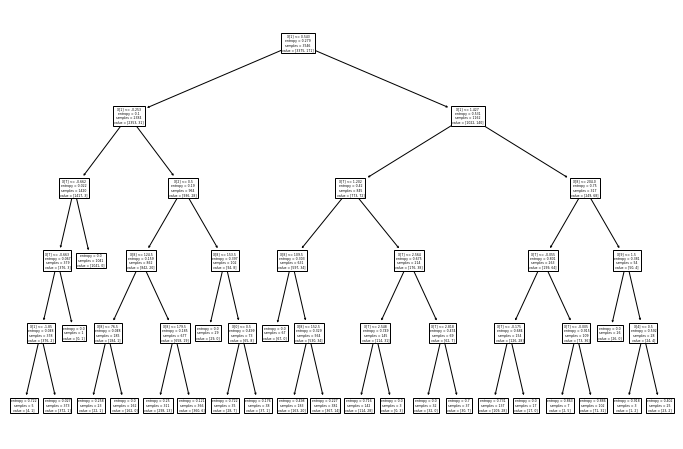

In [49]:

# plt.figure(figsize=(12,8))

# tree.plot_tree(model.fit(X_trainset, y_trainset)) 

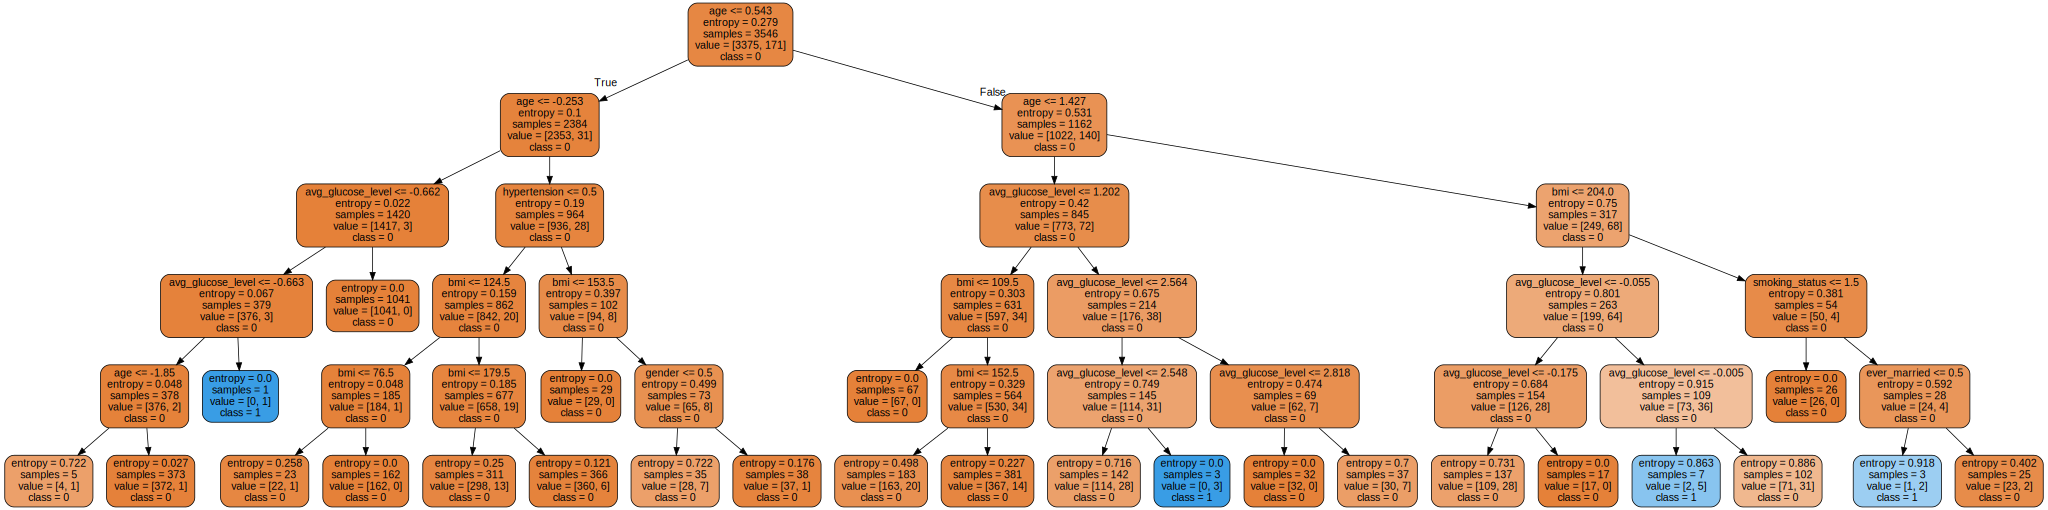

In [51]:
from sklearn import tree
import graphviz 

dt_feature_names = list(X1.columns)  
dot_data = tree.export_graphviz(model, 
                              feature_names=dt_feature_names,  
                              class_names=np.unique(y_trainset), filled=True, rounded = True)

graph = graphviz.Source(dot_data) 
graph

# Exporting the image to a file

In [208]:
import pydotplus
from six import StringIO

dot = StringIO()
dt_feature_names = list(X1.columns)
# this makes the tree (graph object) and is stores in dot_data1, and output is saved in  outputfile: 'dot'
dot_data1 = tree.export_graphviz(model, out_file= dot, 
                              feature_names=dt_feature_names,  
                              class_names=np.unique(y_trainset), filled=True, rounded = True)

In [209]:
filename = "model5.png"
     # pydotplus uses graph
graph = pydotplus.graph_from_dot_data(dot.getvalue())  
graph.write_png(filename)

True

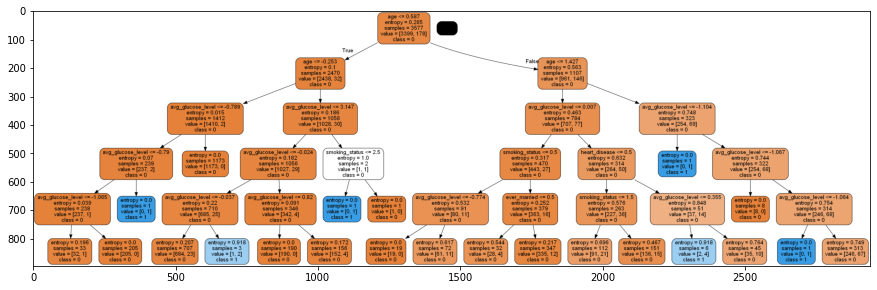

In [210]:
import matplotlib.image as mpimg
img = mpimg.imread(filename)
plt.figure(figsize=(15, 20))
plt.imshow(img)

In [ ]:
# import pydotplus
# import sklearn.tree as tree
# from IPython.display import Image

# dt_feature_names = list(X.columns)
# dt_target_names = [str(s) for s in Y.unique()]
# tree.export_graphviz(dt, out_file='tree.dot', 
#     feature_names=dt_feature_names, class_names=dt_target_names,
#     filled=True)  
# graph = pydotplus.graph_from_dot_file('tree.dot')
# Image(graph.create_png())